In [1]:
import json
import argparse
import imutils
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage.color import rgb2gray  
from scipy import ndimage
import glob
import matplotlib.patches as patches

Downloading the json dataset:

In [2]:
with open(r'C:\Users\Dag Bjornberg\Downloads\Pith\Pith2.json') as f:
  Pith2JSON = json.load(f)

Finding the image name of the second image (the pith was quite clearly visible here so I chose this).

In [3]:
imageJSON = Pith2JSON['images'][1] #second image in json file
imagelabel = imageJSON['image_name']
print(imagelabel)

d79ef146-c171-4448-ad11-ba864001399f.jpg


Now we simply upload and plot this particular image:

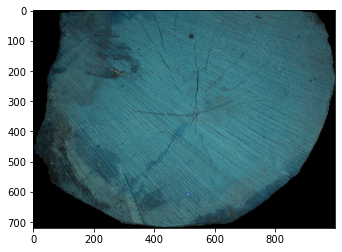

In [4]:
imageJPG = cv2.imread(r'C:\Users\Dag Bjornberg\Downloads\Pith\Pith2\d79ef146-c171-4448-ad11-ba864001399f.jpg')
plt.imshow(imageJPG)

Now we find the bounding box coordinates of the pith:

In [5]:
bbox = imageJSON['labels'][0]['bbox']
print(bbox)

[527, 337, 547, 353]


Plotting the coordinates together with the picture:

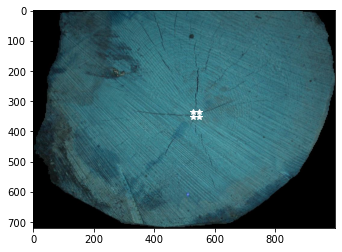

In [6]:
plt.imshow(imageJPG)
plt.plot(bbox[0], bbox[1], '*', color = 'w')
plt.plot(bbox[2], bbox[1], '*', color = 'w')
plt.plot(bbox[2], bbox[3], '*', color = 'w')
plt.plot(bbox[0], bbox[3], '*', color = 'w')

We see that the pith was located correctly. Let us create a rectangle from these points, and find the midpoint of this rectangle.

In [7]:
rect = patches.Rectangle((bbox[0], bbox[1]), bbox[2] - bbox[0], bbox[3] - bbox[1], linewidth=1, edgecolor='r')
c1 = (bbox[0] + bbox[2])/2
c2 = (bbox[1] + bbox[3])/2
c = np.array([c1, c2]) #pith center

Plotting the rectangle as well as the center of the pith (center of the rectangle):

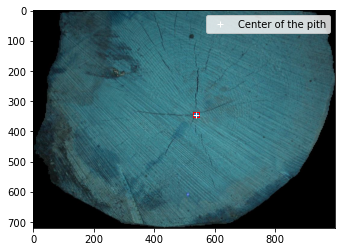

In [8]:
plt.imshow(imageJPG)
ax = plt.gca()
ax.add_patch(rect)
plt.plot(c[0], c[1], '+', color = 'w')
plt.legend(['Center of the pith'])

Computing the distance between the center of the pith and the center of mass of the log: In a previous notebook we computed the center of mass, we will now use this again.

We start by finding the center of mass.

In [9]:
lower = np.array([1, 1, 1])
higher = np.array([250, 250, 250])
mask = cv2.inRange(imageJPG, lower, higher)
mask = np.array(mask)
COM = ndimage.measurements.center_of_mass(mask) #Center Of Mass
COM = np.flip(np.array(COM)) # changing so x-coordinate is first

Plot the center of mass together with the center of the pith.

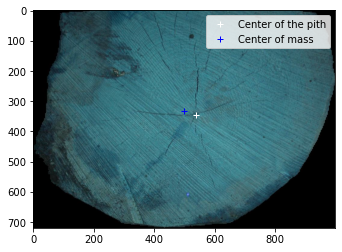

In [10]:
plt.imshow(imageJPG)
plt.plot(c[0], c[1], '+', color = 'w')
plt.plot(COM[0], COM[1], '+', color ='b')
plt.legend(['Center of the pith','Center of mass'])

Compute the distance between the center of the pith and the center of mass: It is not really the distance we are computing since we have pictures to work with, nor can we compare distances between different logs since the pictures are not taken from the same distance. So this in just an idea on how we could do it. 

In [11]:
distance = np.linalg.norm(c-COM)
print({'distance between center of the pith and center of mass': distance})

{'distance between center of the pith and center of mass': 40.14978872493417}


Creating methods:

In [19]:
def get_center_of_mass(imageJPG):
    grayscale_image = cv2.inRange(imageJPG, lower, higher)
    return get_center_of_mass_from_grayscale_image(grayscale_image)

def get_center_of_mass_from_grayscale_image(grayscale_image):
    y, x = ndimage.measurements.center_of_mass(grayscale_image)
    return x, y

def get_center_of_pith(imageJSON):
    bbox = imageJSON['labels'][0]['bbox']
    c1 = (bbox[0] + bbox[2])/2
    c2 = (bbox[1] + bbox[3])/2
    return np.array([c1, c2]) #pith center

def distance_between_center_of_mass_and_center_of_pith(imageJSON, imageJPG):
    COM = np.array(get_center_of_mass(imageJPG))
    return np.linalg.norm(get_center_of_pith(imageJSON)-COM) 
    return np.linalg.norm(get_center_of_pith(imageJSON)-COM)
    

In [20]:
print(get_center_of_pith(imageJSON))
print(distance_between_center_of_mass_and_center_of_pith(imageJSON, imageJPG))

[537. 345.]
40.14978872493417
